In [449]:
from scipy.optimize import minimize
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad as integral
from collections import OrderedDict
from scipy.stats import kstest
from scipy import stats
from scipy.stats import multivariate_normal as multinorm
import pandas as pd
%matplotlib nbagg

In [1]:
BDIR=f"./"

In [2]:
FIGDIR=f"{BDIR}/figures/"

## Useful routines

In [3]:
def multiNorm2D(x,params,xmin=None,xmax=None):
    """
    x: Value
    params: weigths, locs, covs
    args:
        N: normalization constant
        xmin, xmax: Truncation constants
    """
    N=np.int(len(params)/3)
    weights=params[:N]
    Nint=sum(weights)    
    locs=params[N:2*N]
    covs=params[2*N:]
    y=0
    for n in range(N):
        y+=weights[n]*stats.norm.pdf(x,loc=locs[n],scale=scales[n])
    return y/Nint

In [126]:
locs1=[0.0,0.0]
scales1=[0.5,0.5,0.4]
cov1=[[scales1[0]**2,scales1[2]*scales1[0]*scales1[1]],[scales1[2]*scales1[0]*scales1[1],scales1[1]**2]]

locs2=[1.5,2.6]
scales2=[0.5,0.5,-0.7]
cov2=[[scales2[0]**2,scales2[2]*scales2[0]*scales2[1]],[scales2[2]*scales2[0]*scales2[1],scales2[1]**2]]


In [127]:
"""
H,xvec,yvec=np.histogram2d(xs[:,0],xs[:,1],20)
xvec=(xvec[1:]+xvec[:-1])/2
yvec=(yvec[1:]+yvec[:-1])/2
#xvec=xvec[1:]
#yvec=yvec[1:]
X,Y=np.meshgrid(xvec,yvec)
"""

'\nH,xvec,yvec=np.histogram2d(xs[:,0],xs[:,1],20)\nxvec=(xvec[1:]+xvec[:-1])/2\nyvec=(yvec[1:]+yvec[:-1])/2\n#xvec=xvec[1:]\n#yvec=yvec[1:]\nX,Y=np.meshgrid(xvec,yvec)\n'

In [128]:
xs.shape

(1000, 2)

<IPython.core.display.Javascript object>


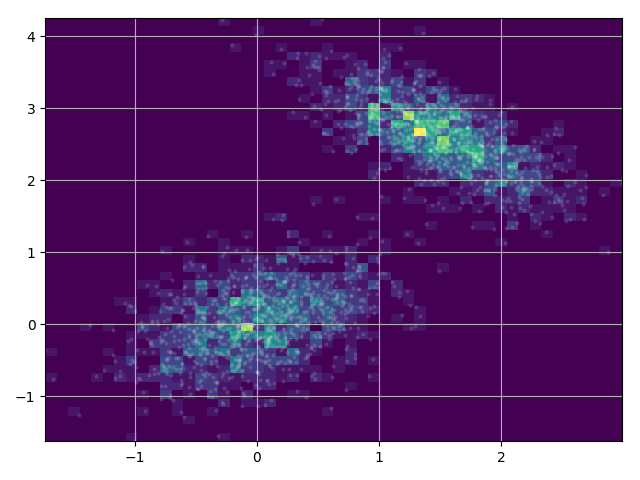

In [134]:
#Generate
xs=multinorm.rvs(locs1,cov1,1000)
xs=np.vstack((xs,multinorm.rvs(locs2,cov2,1000)))

multinorm.rvs(locs,cov2,1000)

#Plot
fig=plt.figure()
ax=fig.gca()

H,xvec,yvec,plots=ax.hist2d(xs[:,0],xs[:,1],50)
ax.plot(xs[:,0],xs[:,1],'wo',alpha=0.1,ms=2)

ax.set_xlim((xvec[0],xvec[-1]))
ax.set_ylim((yvec[0],yvec[-1]))

ax.grid()

fig.tight_layout()

In [236]:
import spiceypy as sp
DEG=np.pi/180

### Generate a symmetrical covariance matrix from a scale matrix and a rotation
http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

In [275]:
#Scale matrix
L=[[0.1,0.0,0.0],[0.0,0.8,0.0],[0.0,0.0,0.2]]

In [280]:
#Rotation matrix
R=sp.eul2m(30*DEG,60*DEG,45*DEG,3,1,3)

In [281]:
C=sp.mxm(sp.mxm(R,sp.mxm(L,L)),sp.invert(R))

In [282]:
C

array([[ 0.4079615 , -0.01380647, -0.29795431],
       [-0.01380647,  0.0282885 ,  0.029524  ],
       [-0.29795431,  0.029524  ,  0.25375   ]])

In [283]:
xs=multinorm.rvs(locs[0],C,1000)

In [ ]:
np.linalg.

In [434]:
def getCovariances(scales,rhos):
    covs=[]
    for scale,angle in zip(scales,angles):
        L=np.identity(len(scale))*np.outer(np.ones(len(scale)),scale)
        R=sp.eul2m(-angle[0],-angle[1],-angle[2],3,1,3)
        covs+=[sp.mxm(sp.mxm(R,sp.mxm(L,L)),sp.invert(R))]
    return covs

<IPython.core.display.Javascript object>


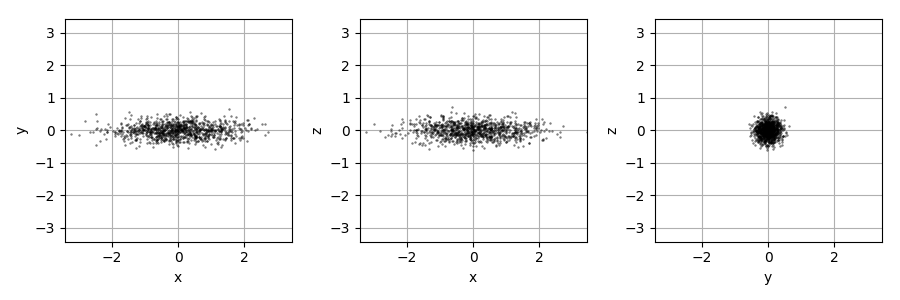

In [570]:
#Parameters
#(mu_x,mu_y,mu_z)
locs=[[0,0,0],[1.5,1.5,1.5]]
#(sigma_x,sigma_y,sigma_z)
scales=[[1.0,0.2,0.2],[0.2,0.2,0.2]]
#(rho_xy,rho_xz,rho_yz)
angles=[[0*DEG,0*DEG,0*DEG],[0.0,0.0,0.0]]
#Covariance matrices
covs=getCovariances(scales,rhos)

#Generate
xs=multinorm.rvs(locs[0],covs[0],1000)

#Plot
fig,axs=plt.subplots(1,3,figsize=(9,3))

vmax=xs.max()
pargs=dict(color='k',ls='None',marker='+',ms=2,alpha=0.5)
axis=["x","y","z"]
pairs=[[0,1],[0,2],[1,2]]

for n,pair in enumerate(pairs):
    ax=axs[n]
    i=pair[0];j=pair[1]
    #ax.hist2d(xs[:,i],xs[:,j])
    ax.plot(xs[:,i],xs[:,j],**pargs)
    ax.set_xlabel(axis[i]);ax.set_ylabel(axis[j])

for ax in axs:
    ax.grid()
    ax.set_xlim((-vmax,vmax))
    ax.set_ylim((-vmax,vmax))
    
fig.tight_layout()

In [522]:
data=np.loadtxt("NEOs.txt")
neos=pd.DataFrame(data,columns=["q","e","i","sini","a","W","w"])
#neos["Q"]=(1-neos["q"])/(1+neos["q"])
neos["Q"]=np.log(neos["q"]/(1-neos["q"]))
neos["E"]=np.log(neos["e"]/(1-neos["e"]))
neos["I"]=np.log((neos["i"]/180)/(1-(neos["i"]/180)))

In [523]:
neos.describe()

,q,e,i,sini,a,W,w,Q,E,I
count,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000
mean,0.678313,0.591753,21.128338,0.346668,1.817262,172.558561,181.041693,1.072005,0.420269,-2.274073
std,0.223048,0.171053,14.366254,0.212230,0.682294,104.174156,105.831543,1.454913,0.808675,0.879910
min,0.081881,0.071638,0.146150,0.002551,0.549695,0.086510,0.019390,-2.417053,-2.561790,-7.115266
25%,0.516611,0.480041,9.992375,0.173517,1.348770,81.549932,90.734375,0.066470,-0.079880,-2.834024
50%,0.708250,0.606480,17.979020,0.308669,1.783858,165.625325,183.691945,0.886898,0.432539,-2.198520
75%,0.870225,0.716947,29.257705,0.488342,2.235777,262.921038,273.216085,1.902952,0.929368,-1.639429
max,0.999555,0.968381,154.366840,0.967612,17.786568,359.862750,359.918740,7.717666,3.421877,1.795445


<IPython.core.display.Javascript object>


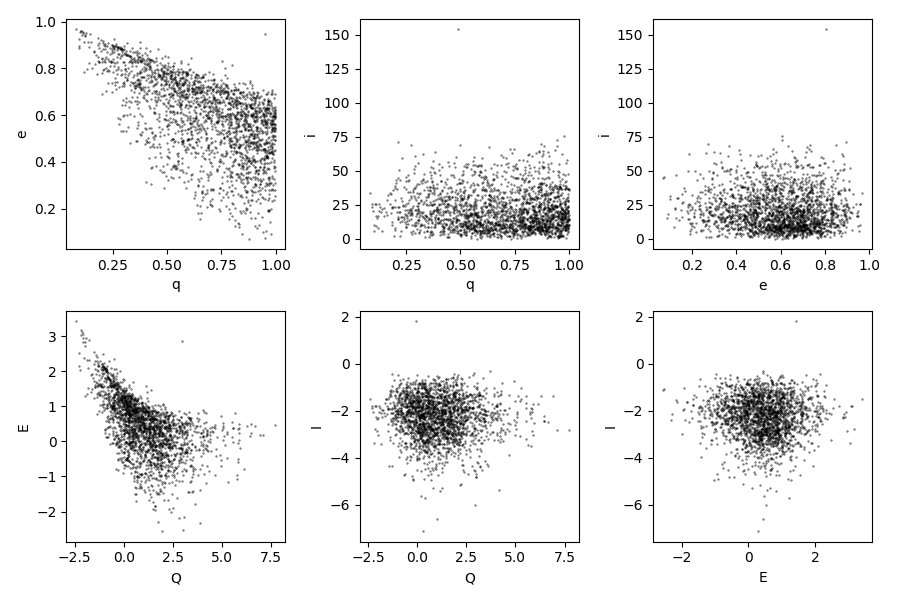

In [524]:
#Plot
fig,axs=plt.subplots(2,3,figsize=(9,6))

qcont=False
pargs=dict(color='w' if qcont else 'k',ls='None',marker='+',ms=2,alpha=0.5)
hargs=dict(cmap="nipy_spectral")
pairs=[["q","e"],["q","i"],["e","i"]]

for n,pair in enumerate(pairs):
    q1=pair[0]
    q2=pair[1]
    ax=axs[0,n]
    if qcont:ax.hist2d(neos[q1],neos[q2],**hargs)
    ax.plot(neos[q1],neos[q2],**pargs)
    ax.set_xlabel(q1);ax.set_ylabel(q2)

hargs=dict(cmap="nipy_spectral")
pargs=dict(color='w' if qcont else 'k',ls='None',marker='+',ms=2,alpha=0.5)
pairs=[["Q","E"],["Q","I"],["E","I"]]

for n,pair in enumerate(pairs):
    q1=pair[0]
    q2=pair[1]
    ax=axs[1,n]
    if qcont:ax.hist2d(neos[q1],neos[q2],**hargs)
    ax.plot(neos[q1],neos[q2],**pargs)
    ax.set_xlabel(q1);ax.set_ylabel(q2)
        
fig.tight_layout()

In [487]:
neos["Q"]=(1-neos["q"])/(1+neos["q"])
neos["E"]=np.log(neos["e"]/(1-neos["e"]))
neos["I"]=np.log((neos["i"]/180)/(1-(neos["i"]/180)))

In [599]:
def marginalMultinorm(vf,loc,cov,v1,v2,perm):
    v=[vf,v1,v2]
    r=[v[perm[0]-1],v[perm[1]-1],v[perm[2]-1]]
    p=multinorm.pdf(r,loc,cov)
    return p

In [601]:
marginalMultinorm(0.1,locs[0],covs[0],0.2,0.3,[1,2,3])

0.36155650038591997

In [588]:
#x,y,z
multinorm.pdf([0.1,0.2,0.3],locs[0],covs[0])

0.36155650038591997

In [589]:
#x,z,y
multinorm.pdf([0.1,0.3,0.2],locs[0],covs[0])

0.22625627651010488

In [590]:
#y,x,z
multinorm.pdf([0.2,0.1,0.3],locs[0],covs[0])

0.518229567028636

In [591]:
#y,z,x
multinorm.pdf([0.2,0.3,0.1],locs[0],covs[0])

0.24479431410578542

In [592]:
#z,x,y
multinorm.pdf([0.3,0.1,0.2],locs[0],covs[0])

0.5909127194512868

In [593]:
#z,y,x
multinorm.pdf([0.3,0.2,0.1],locs[0],covs[0])

0.44604432196085114

In [602]:
integral(marginalMultinorm,-np.inf,np.inf,args=(locs[0],covs[0],0,0,[2,3,1]))

(0.7957747154594766, 2.8663163755478353e-12)

<IPython.core.display.Javascript object>


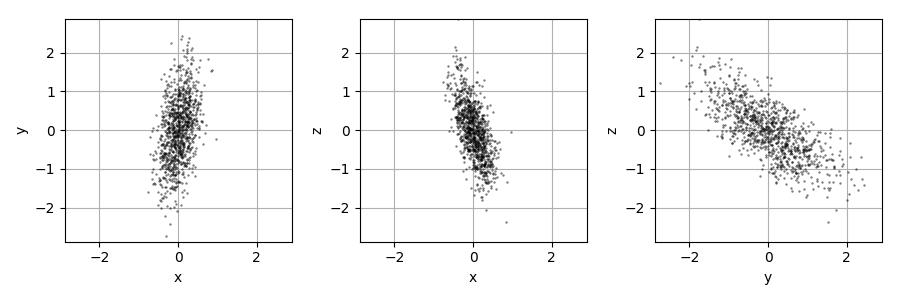

In [663]:
#Parameters
#(mu_x,mu_y,mu_z)
locs=[[0,0,0],[1.5,1.5,1.5]]
#(sigma_x,sigma_y,sigma_z)
scales=[[1.0,0.2,0.4],[0.2,0.2,0.2]]
#(rho_xy,rho_xz,rho_yz)
angles=[[30*DEG,-45*DEG,60*DEG],[0.0,0.0,0.0]]
#Covariance matrices
covs=getCovariances(scales,rhos)

#Generate
xs=multinorm.rvs(locs[0],covs[0],1000)

#Plot
fig,axs=plt.subplots(1,3,figsize=(9,3))

vmax=xs.max()
pargs=dict(color='k',ls='None',marker='+',ms=2,alpha=0.5)
axis=["x","y","z"]
pairs=[[0,1],[0,2],[1,2]]

for n,pair in enumerate(pairs):
    ax=axs[n]
    i=pair[0];j=pair[1]
    #ax.hist2d(xs[:,i],xs[:,j])
    ax.plot(xs[:,i],xs[:,j],**pargs)
    ax.set_xlabel(axis[i]);ax.set_ylabel(axis[j])

for ax in axs:
    ax.grid()
    ax.set_xlim((-vmax,vmax))
    ax.set_ylim((-vmax,vmax))
    
fig.tight_layout()

In [664]:
vs=np.linspace(-2,2,50)
mxs=[integral(marginalMultinorm,-np.inf,np.inf,args=(locs[0],covs[0],x,0,[2,3,1]))[0] for x in vs]
mys=[integral(marginalMultinorm,-np.inf,np.inf,args=(locs[0],covs[0],0,y,[2,3,1]))[0] for y in vs]

<IPython.core.display.Javascript object>


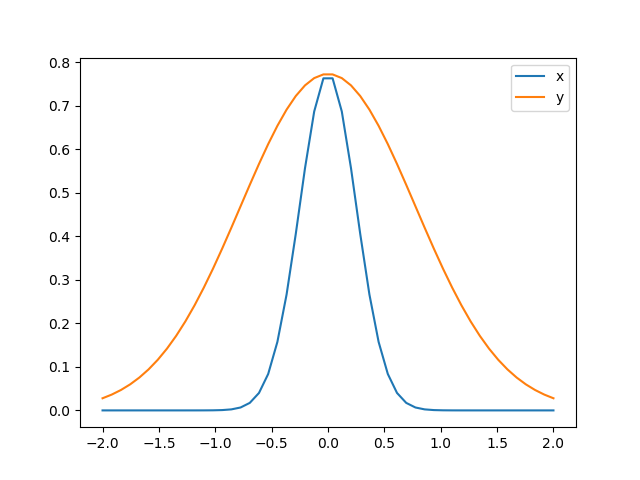

In [667]:
fig=plt.figure()
ax=fig.gca()
ax.plot(vs,mxs,label='x')
ax.plot(vs,mys,label='y')
ax.legend()

In [666]:
NX=NY=NZ=10
vmax=3
xvec=np.linspace(-vmax,vmax,NX)
yvec=np.linspace(-vmax,vmax,NY)
zvec=np.linspace(-2,2,NZ)
Xxy,Yxy=np.meshgrid(xvec,yvec)
Xxz,Zxz=np.meshgrid(xvec,zvec)
Yyz,Zyz=np.meshgrid(yvec,zvec)

PXY=np.zeros((NX,NY))
for i,x in enumerate(xvec):
    for j,y in enumerate(yvec):
        PXY[j,i]=integral(marginalMultinorm,-np.inf,np.inf,args=(locs[0],covs[0],x,y,[2,3,1]))[0]
        
PXZ=np.zeros((NX,NZ))
for i,x in enumerate(xvec):
    for j,z in enumerate(zvec):
        PXZ[j,i]=integral(marginalMultinorm,-np.inf,np.inf,args=(locs[0],covs[0],x,z,[2,1,3]))[0]

PYZ=np.zeros((NY,NZ))
for i,y in enumerate(yvec):
    for j,z in enumerate(zvec):
        PYZ[j,i]=integral(marginalMultinorm,-np.inf,np.inf,args=(locs[0],covs[0],y,z,[1,2,3]))[0]

<IPython.core.display.Javascript object>


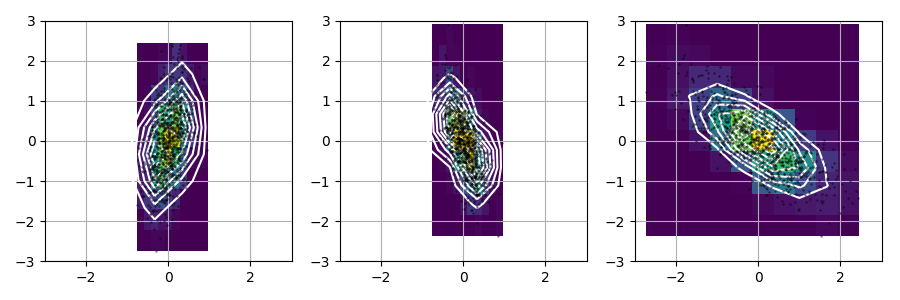

In [685]:
fig,axs=plt.subplots(1,3,figsize=(9,3))

pargs=dict(color='k',ls='None',marker='+',ms=2,alpha=0.5)

i=-1

i+=1
axs[i].contour(Xxy,Yxy,PXY,colors='w')
axs[i].hist2d(xs[:,0],xs[:,1])
axs[i].plot(xs[:,0],xs[:,1],**pargs)

i+=1
axs[i].contour(Xxz,Zxz,PXZ,colors='w')
axs[i].hist2d(xs[:,0],xs[:,2])
axs[i].plot(xs[:,0],xs[:,2],**pargs)

i+=1
axs[i].contour(Yyz,Zyz,PYZ,colors='w')
axs[i].hist2d(xs[:,1],xs[:,2])
axs[i].plot(xs[:,1],xs[:,2],**pargs)

for ax in axs:
    ax.grid()
    ax.set_xlim((-vmax,vmax))
    ax.set_ylim((-vmax,vmax))
    
fig.tight_layout()

In [678]:
def getCovariances(scales,angles):
    covs=[]
    for scale,angle in zip(scales,angles):
        L=np.identity(len(scale))*np.outer(np.ones(len(scale)),scale)
        R=sp.eul2m(-angle[0],-angle[1],-angle[2],3,1,3)
        covs+=[sp.mxm(sp.mxm(R,sp.mxm(L,L)),sp.invert(R))]
    return covs

def multiNorm3D(x,weights,locs,scales,angles):
    N=len(weights)
    covs=getCovariances(scales,angles)
    weights[-1]=1-sum(weights[:-1])
    value=0
    for w,loc,cov in zip(weights,locs,covs):
        value+=w*multinorm.pdf(x,loc,cov)
    return value

In [679]:
#Parameters
#Weights
weights=[0.8,0.0]
#(mu_x,mu_y,mu_z)
locs=[[0,0,0],[1.5,1.5,1.5]]
#(sigma_x,sigma_y,sigma_z)
scales=[[1.0,0.2,0.4],[0.2,0.2,1.0]]
#(rho_xy,rho_xz,rho_yz)
angles=[[30*DEG,-45*DEG,60*DEG],[0.0,0.0,0.0]]

In [682]:
multiNorm3D([0,0,0],weights,locs,scales,angles)

0.6349363593424098

In [684]:
%timeit -n 100 multiNorm3D([0,0,0],weights,locs,scales,angles)

100 loops, best of 3: 813 µs per loop
